In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import uncertainty_wizard as uwiz
from sklearn.model_selection import train_test_split


C:\Users\lhary\AppData\Local\Temp\ipykernel_8404\523503330.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Training data:        (56000, 28, 28)
Training solution:    (56000,)
Test data:            (14000, 28, 28)
Test solution:        (14000,)


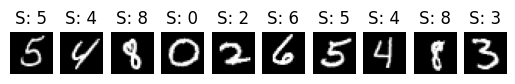

Training data:        (56000, 28, 28, 1)
Training solution:    (56000, 10)
Test data:            (14000, 28, 28, 1)
Test solution:        (14000, 10)


In [2]:
# LOAD
data = pd.read_csv('mnist.csv')
x_all = data.drop('solution', axis=1).values
y_all = data['solution'].values

# RESHAPE
x_all_fixed = x_all.reshape(-1, 28, 28)

# SPLIT
x_train, x_test, y_train, y_test = train_test_split(x_all_fixed, y_all, test_size=0.2, random_state=42)


print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

fig, axes = plt.subplots(1, 10)
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f"S: {y_train[i]}")
    axes[i].axis('off')
plt.show()

x_train = (x_train.astype('float32') / 255).reshape(x_train.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_test = (x_test.astype('float32') / 255).reshape(x_test.shape[0], 28, 28, 1)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)      #??????????

print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

COMPILING...
FIT...
11/11 [==============================] - 46s 2s/step - loss: 2.3111 - accuracy: 0.0835 - val_loss: 2.3084 - val_accuracy: 0.0945
SAVING SETTINGS...
INFO:tensorflow:Assets written to: model_settings\assets


INFO:tensorflow:Assets written to: model_settings\assets


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 uwiz_bernoulli_dropout_9 (  (None, 12, 12, 64)        0         
 UwizBernoulliDropout)                                           
                                                                 
 flatten_10 (Flatten)        (None, 9216)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

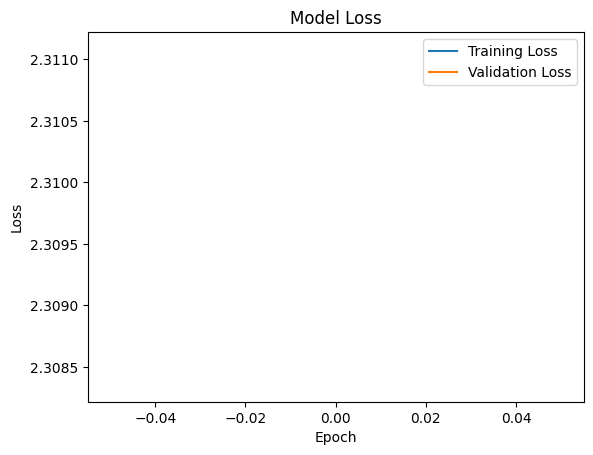

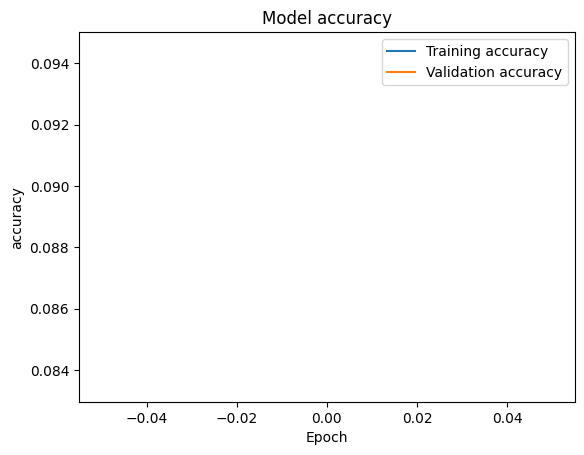

In [13]:

# model = tf.keras.models.Sequential()
model = uwiz.models.StochasticSequential()


# model.add(tf.keras.layers.Conv2D(filters, kernel_size=(size), activation='methods', input_shape=(shape info)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size=(max pooling height and width)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Dropout(fraction %)) 
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(digits, activation='methods'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# COMPILE
print("COMPILING...")
model.compile(loss      = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adadelta(),
              metrics   = ['accuracy'])

# FIT
print("FIT...")
model_info = model.fit(x_train, y_train, 
                       validation_split = 0.1, 
                       batch_size       = 5000, 
                       epochs           = 1,
                       verbose          = 1, 
                       callbacks        = [tf.keras.callbacks.EarlyStopping(patience=2)])

# SAVING SETTINGS
print("SAVING SETTINGS...")
# model.save("model_settings") dosent work with uwiz.models.StochasticSequential()
model.inner.save_weights('model_weights')

print(model.inner.summary())


# PLOT
print("PLOT...")
plt.plot(model_info.history['loss']     , label='Training Loss')
plt.plot(model_info.history['val_loss'] , label='Validation Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(model_info.history['accuracy']     , label='Training accuracy')
plt.plot(model_info.history['val_accuracy'] , label='Validation accuracy')

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()